In [2]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("clean_database.csv",index_col=0)

In [4]:
columns = ["chronic_kidney_disease_diagnosis"]
df.loc[:,columns]

,chronic_kidney_disease_diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
2156,1
2157,1
2158,3
2159,2


In [102]:
X = df.drop(columns=columns[0])  # reemplaza 'target' por tu columna objetivo
X = df.drop(columns="gfr_category")  # reemplaza 'target' por tu columna objetivo
y = df[columns[0]]

X_encoded = X.copy()
for col in X.select_dtypes(include=['object', 'category']).columns:
    X_encoded[col] = LabelEncoder().fit_transform(X[col])

selector = SelectKBest(score_func=f_classif,k=15) 
X_new = selector.fit_transform(X_encoded, y)

selected_features = X_encoded.columns[selector.get_support()]
results =list(zip(selected_features,selector.scores_))

results.sort(key=lambda x:x[1])
print("Mejores características seleccionadas:")
for i,j in results:
    print(f"Atributo {i}: score: {j}")

Mejores características seleccionadas:
Atributo age_years: score: 0.5168145625131998
Atributo personal_history_dyslipidemia: score: 0.9524347881119053
Atributo bmi_category: score: 1.4360701037495507
Atributo abdominal_perimeter: score: 1.5587393386069417
Atributo hdl_cholesterol_pathological: score: 1.7441425311444476
Atributo glomerular_filtration_rate: score: 3.4390326516881244
Atributo weight_kg: score: 3.5954473806193734
Atributo chronic_kidney_disease_diagnosis: score: 6.63798231790078
Atributo hba1c_elevated: score: 7.601488649108515
Atributo female_specific_conditions: score: 8.544336947874731
Atributo other_personal_history: score: 12.370835103253906
Atributo microalbuminuria_category: score: 16.73233326797592
Atributo ldl_cholesterol_pathological: score: 24.523756427707127
Atributo family_history_overweight_obesity: score: 25.112190384636154
Atributo gfr_proteinuria_relationship: score: 25.274033239659374


/home/robdres/KidneyTool/model/model/env/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [103]:
results2 = [list( a) for a in results[0:10]]

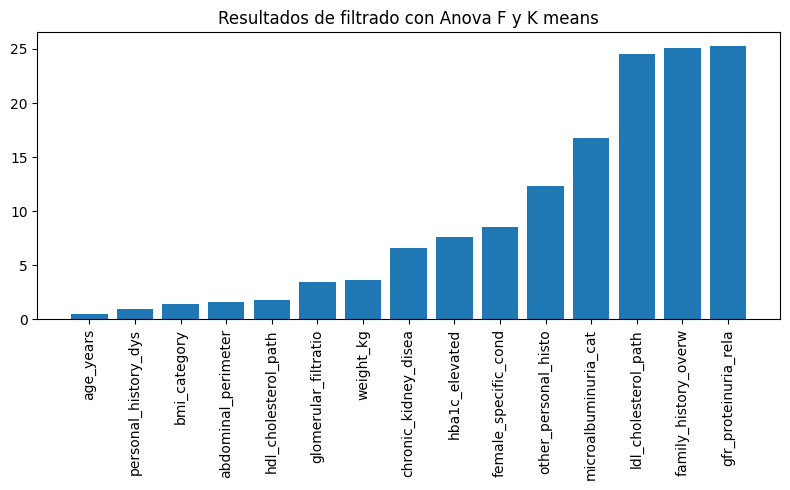

In [105]:
import matplotlib.pyplot as plt
import pandas
plt.figure(figsize=(8, 5))
plt.title("Resultados de filtrado con Anova F y K means")
plt.xticks(rotation=90)
def a (x):
    return x[0:20]
labels =selected_features.map(a)
df1 = pandas.DataFrame(zip(labels,selector.scores_[0:len(selected_features)]))
df1= df1.sort_values(1)
plt.bar(df1[0],df1[1])
plt.tight_layout()
plt.savefig("cas.png")